# Apply and Visualize UMAP

**Gregory Way, 2019**

Apply UMAP to merged batch 1 and batch 3 data

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(umap))

In [2]:
set.seed(12345)

In [3]:
file <- file.path("data", "batch1_batch3_combined_normalized_variable_selected.tsv")

cp_cols <- readr::cols(
    .default = readr::col_double(),
    Metadata_Batch = readr::col_character(),
    Metadata_Plate = readr::col_character(),
    Metadata_Well = readr::col_character(),
    Metadata_Assay_Plate_Barcode = readr::col_character(),
    Metadata_Plate_Map_Name = readr::col_character(),
    Metadata_well_position = readr::col_character(),
    Metadata_cell_line = readr::col_character(),
    Metadata_patient = readr::col_character(),
    Metadata_FFA = readr::col_character(),
    Metadata_diff_day = readr::col_character()
)

df <- readr::read_tsv(file, col_types = cp_cols)

dim(df)
head(df, 2)

[1] 850 689

Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_cell_line,Metadata_patient,Metadata_FFA,Metadata_diff_day,Metadata_Batch,⋯,Cells_Texture_Correlation_ER_20_00,Cytoplasm_RadialDistribution_RadialCV_AGP_2of4,Cytoplasm_Correlation_Costes_AGP_Mito,Cytoplasm_Texture_AngularSecondMoment_ER_20_01,Cytoplasm_Texture_InfoMeas2_AGP_10_01,Nuclei_Correlation_K_Mito_AGP,Cells_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_RadialDistribution_MeanFrac_AGP_4of4,Cells_RadialDistribution_MeanFrac_ER_3of4,Cytoplasm_Texture_InfoMeas1_DNA_5_03
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BR00101080,B02,BR00101080,BR00101080,B02,vc,PAC_261,0,3,batch_one,⋯,2.4441351,-0.3103734,-0.8459456,2.4597769,-1.25370822,-1.1040077,0.217482,-0.1579916,0.3902661,0.8610747
BR00101080,B03,BR00101080,BR00101080,B03,sc,PAC_246,0,3,batch_one,⋯,-0.5272874,-0.7377904,0.5993416,-0.1679026,-0.08591185,-0.1820677,-1.406805,1.2549433,-1.2416919,0.5908254


In [4]:
metadata_df <- df %>%
    dplyr::select(dplyr::starts_with("Metadata_"))

cp_df <- df %>%
    dplyr::select(-dplyr::starts_with("Metadata_"))

In [5]:
# Apply UMAP
cp_umap <- umap(as.matrix(cp_df))
cp_umap_df <- cp_umap$layout %>%
    dplyr::as_tibble()

colnames(cp_umap_df) <- c("umap_x", "umap_y")

# Merge with metadata
cp_umap_df <- cp_umap_df %>%
    dplyr::bind_cols(metadata_df)

head(cp_umap_df, 2)

Warning message:
“`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session.”

umap_x,umap_y,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_cell_line,Metadata_patient,Metadata_FFA,Metadata_diff_day,Metadata_Batch
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4.138087,-3.8649776,BR00101080,B02,BR00101080,BR00101080,B02,vc,PAC_261,0,3,batch_one
2.269336,0.9767641,BR00101080,B03,BR00101080,BR00101080,B03,sc,PAC_246,0,3,batch_one


In [6]:
cp_umap_df <- cp_umap_df %>%
    dplyr::select(umap_x, umap_y, Metadata_Plate, Metadata_Well, Metadata_cell_line,
                  Metadata_patient, Metadata_FFA, Metadata_diff_day, Metadata_Batch) %>%
    dplyr::rename(x = umap_x, y = umap_y, Plate = Metadata_Plate,
                  Well = Metadata_Well, Cell_Line = Metadata_cell_line,
                  Patient = Metadata_patient, FFA = Metadata_FFA,
                  Day = Metadata_diff_day, Batch = Metadata_Batch)

head(cp_umap_df, 2)

x,y,Plate,Well,Cell_Line,Patient,FFA,Day,Batch
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4.138087,-3.8649776,BR00101080,B02,vc,PAC_261,0,3,batch_one
2.269336,0.9767641,BR00101080,B03,sc,PAC_246,0,3,batch_one


In [7]:
# Write umap output
file <- file.path("umap_shiny", "data", "combined_batch1_batch3_umap_with_metadata.tsv")
readr::write_tsv(cp_umap_df, file)

## Visualize UMAP Compression

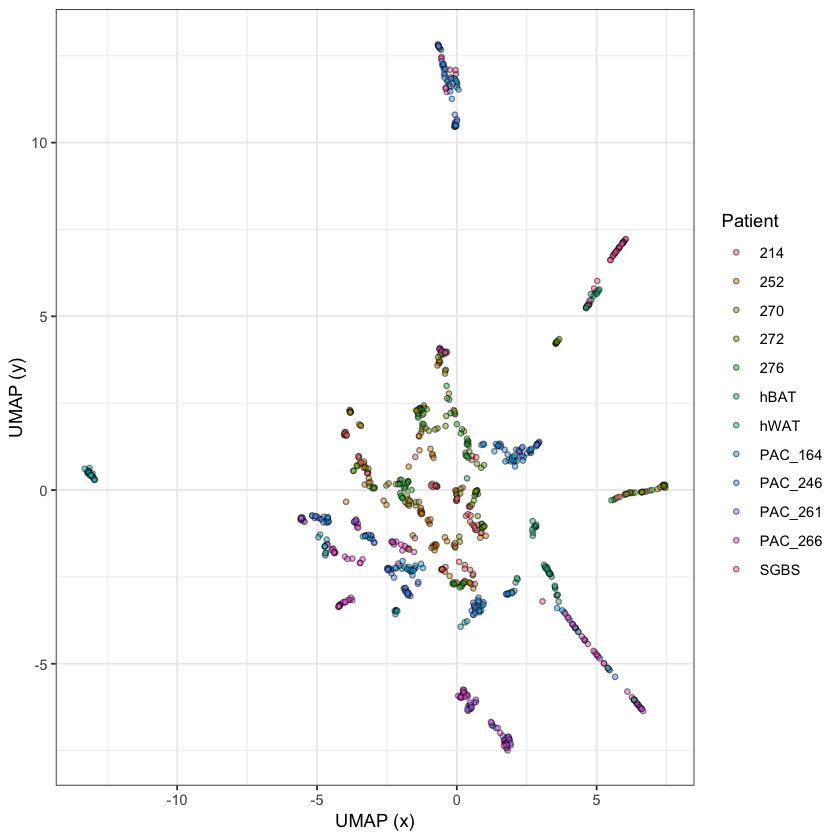

In [8]:
patient_gg <- ggplot(cp_umap_df, aes(x, y)) +
    geom_point(aes(fill = Patient),
               size = 1.2,
               alpha = 0.5,
               color = "black",
               pch = 21) +
    theme_bw() +
    scale_fill_discrete(name = "Patient") +
    xlab("UMAP (x)") +
    ylab("UMAP (y)")

patient_gg

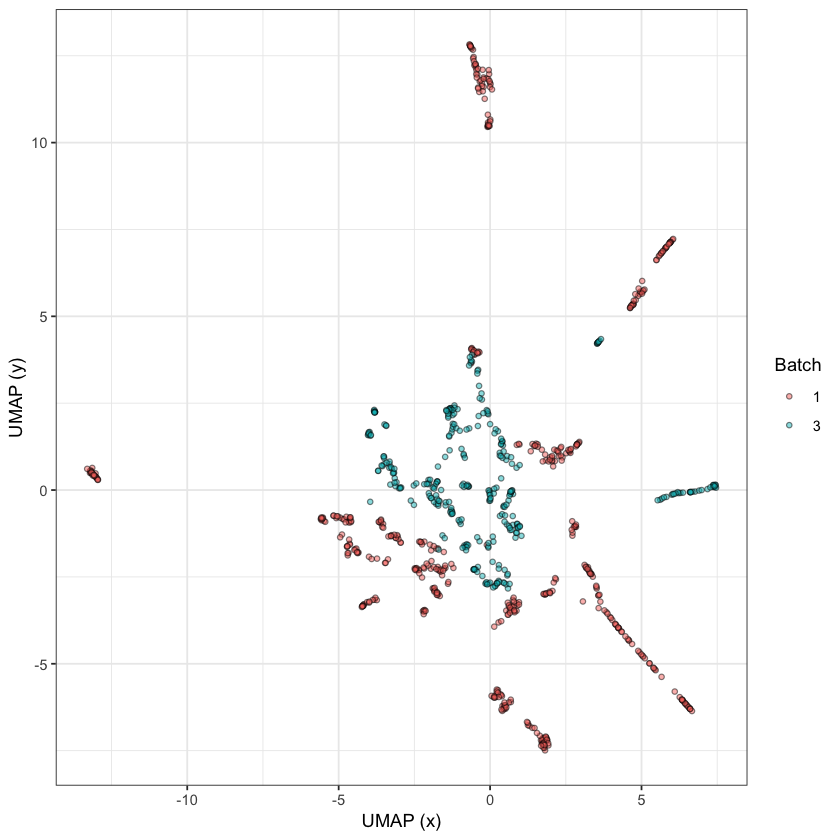

In [9]:
batch_gg <- ggplot(cp_umap_df, aes(x, y)) +
    geom_point(aes(fill = Batch),
               size = 1.2,
               alpha = 0.5,
               color = "black",
               pch = 21) +
    theme_bw() +
    scale_fill_discrete(name = "Batch",
                        labels = c("batch_one" = "1",
                                   "batch_three" = "3")) +
    xlab("UMAP (x)") +
    ylab("UMAP (y)")
 
batch_gg

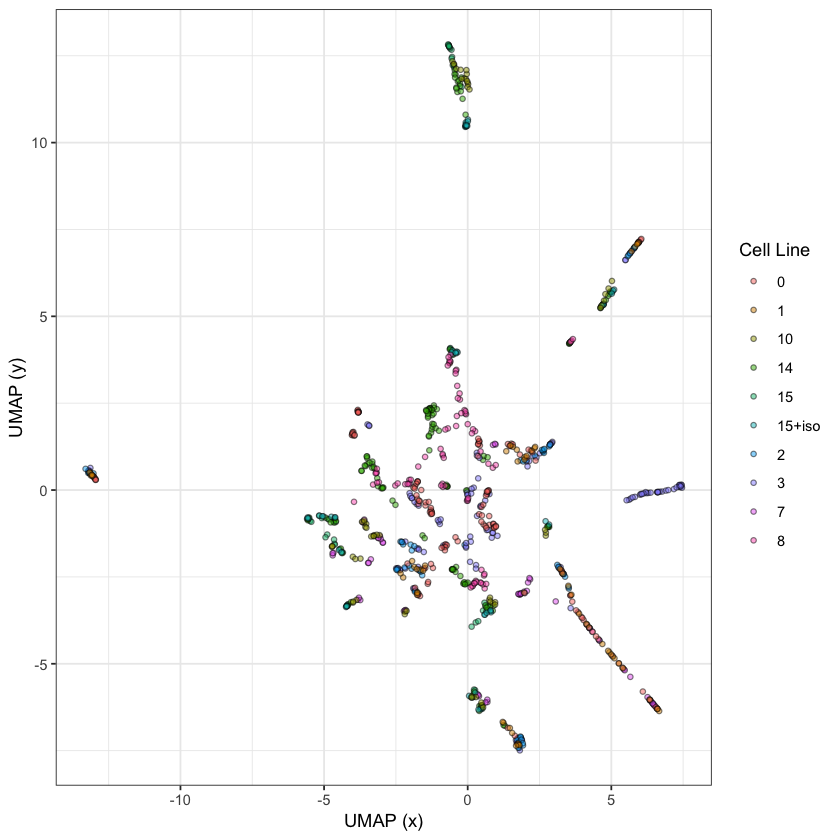

In [10]:
day_gg <- ggplot(cp_umap_df, aes(x, y)) +
    geom_point(aes(fill = Day),
               size = 1.2,
               alpha = 0.5,
               color = "black",
               pch = 21) +
    theme_bw() +
    scale_fill_discrete(name = "Cell Line") +
    xlab("UMAP (x)") +
    ylab("UMAP (y)")
 
day_gg

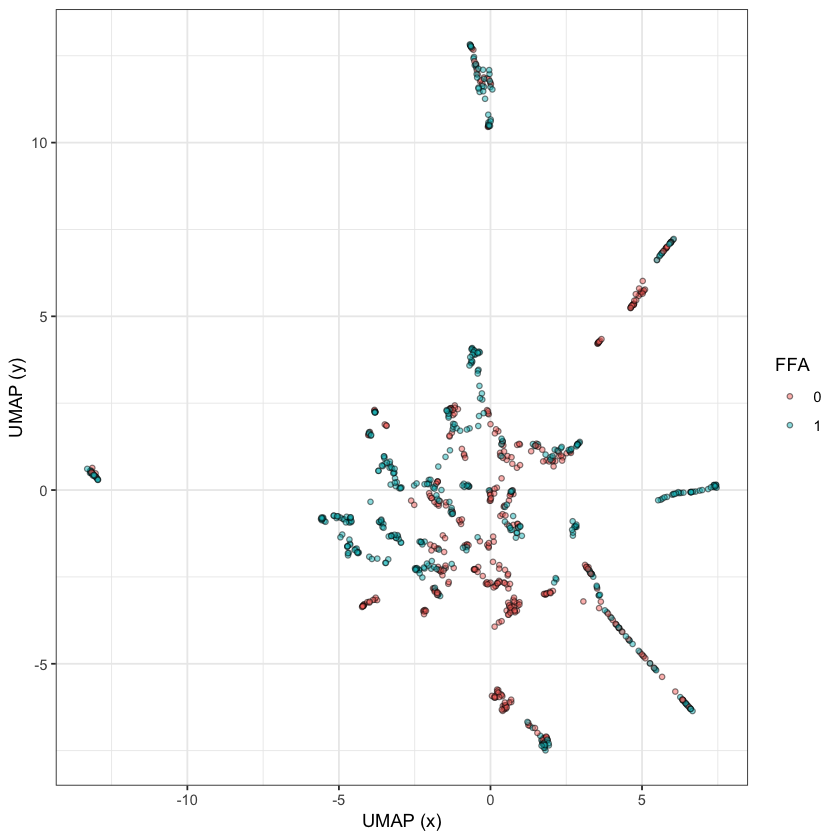

In [11]:
ffa_gg <- ggplot(cp_umap_df, aes(x, y)) +
    geom_point(aes(fill = FFA),
               size = 1.2,
               alpha = 0.5,
               color = "black",
               pch = 21) +
    theme_bw() +
    scale_fill_discrete(name = "FFA") +
    xlab("UMAP (x)") +
    ylab("UMAP (y)")
 
ffa_gg

## Combine Plots into Single Cowplot

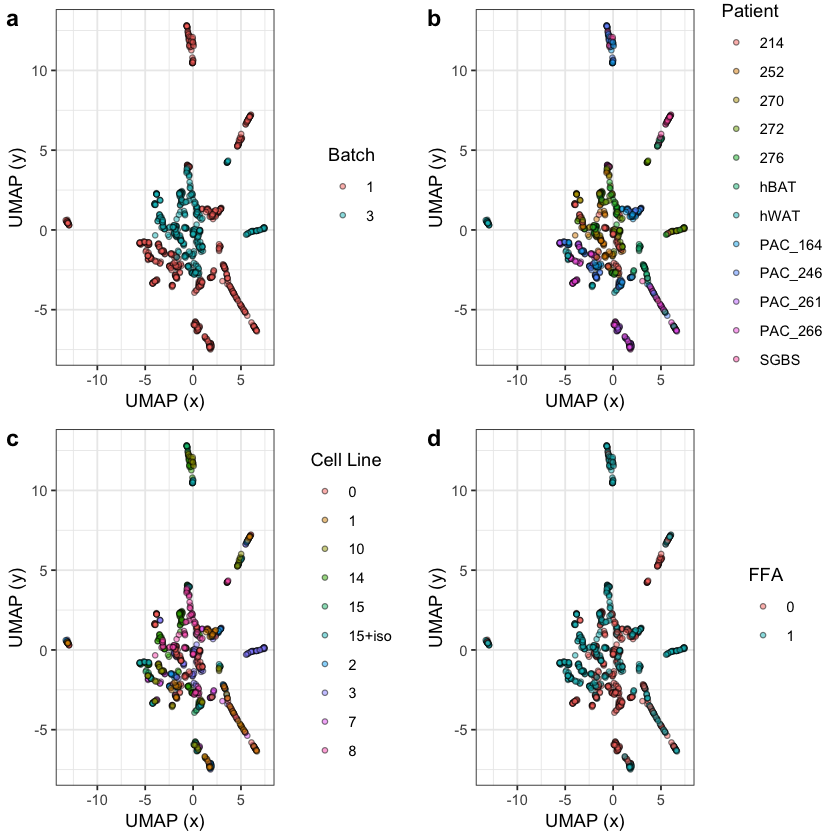

In [12]:
main_plot <- (
    cowplot::plot_grid(
        batch_gg,
        patient_gg,
        day_gg,
        ffa_gg,
        labels = c("a", "b", "c", "d"),
        ncol = 2,
        nrow = 2,
        align = "v"
    )
)

main_plot

In [13]:
for(extension in c('.png', '.pdf')) {
    sup_file <- paste0("umap_metadata_batch1_batch3_combined", extension)
    sup_file <- file.path("figures", sup_file)
    cowplot::save_plot(filename = sup_file,
                       plot = main_plot,
                       base_height = 130,
                       base_width = 200,
                       unit = "mm")
}